# Faculty_Notebook-Day03

## Problem Statement :- Data for classifying patients based on two classes

## Biomechanical features of orthopedic patients

## Columns:-
    pelvic_incidence
    pelvic_tilt numeric
    lumbar_lordosis_angle
    sacral_slope
    pelvic_radius
    degree_spondylolisthesis
    class

## About Data :-
    The data have been organized in two different but related classification tasks.

    column_3C_weka.csv (file with three class labels)

    The first task consists in classifying patients as belonging to one out of three categories: Normal (100 patients), Disk Hernia (60 patients) or Spondylolisthesis (150 patients).
    
    column_2C_weka.csv (file with two class labels)

    For the second task, the categories Disk Hernia and Spondylolisthesis were merged into a single category labelled as 'abnormal'. Thus, the second task consists in classifying patients as belonging to one out of two categories: Normal (100 patients) or Abnormal (210 patients).

## Field Descriptions:

    Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation of the pelvis and lumbar spine (each one is a column):

    pelvic incidence
    pelvic tilt
    lumbar lordosis angle
    sacral slope
    pelvic radius
    grade of spondylolisthesis

## 1.1 Imports

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## 1.2 read the data

In [41]:
data = pd.read_csv('column_2C_weka.csv')

## 1.3 dataset head 

In [42]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


- Features are pelvic_incidence, pelvic_tilt numeric, lumbar_lordosis_angle, sacral_slope, pelvic_radius and degree_spondylolisthesis
- Target variable  is class

## 1.4 ROWS AND COLUMNS

In [43]:
data.shape

(310, 7)

In [44]:
print('No of columns in the dataset:',data.columns.size)
print("Name of Columns:\n",data.columns.values)

No of columns in the dataset: 7
Name of Columns:
 ['pelvic_incidence' 'pelvic_tilt numeric' 'lumbar_lordosis_angle'
 'sacral_slope' 'pelvic_radius' 'degree_spondylolisthesis' 'class']


## 1.5 To check about Numerics/Categorical Columns

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


 - length: 310 (range index)
 - Features are float
 - Target variables are object that is like string

## 1.6 Summary of the Data

In [46]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## 1.7  Pairplot on the data

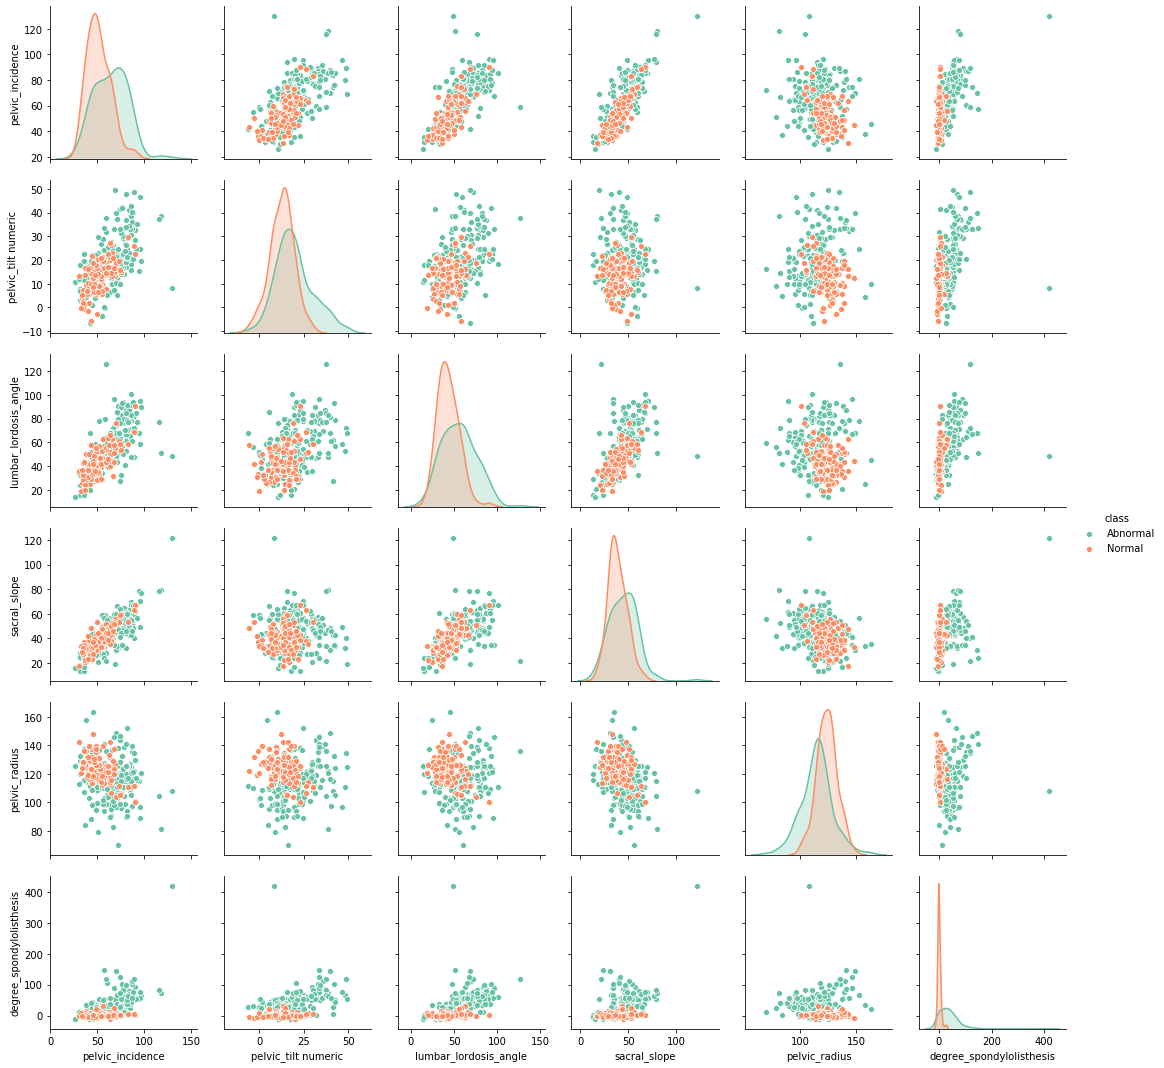

In [47]:
sns.pairplot(data,hue="class",palette="Set2")
plt.show()

##### pd.plotting.scatter_matrix:

    green: normal and red: abnormal
    c: color
    figsize: figure size
    diagonal: histogram of each features
    alpha: opacity
    s: size of marker
    marker: marker type

## 1.8  Scatter Matrix on the Data to find the relations among Features

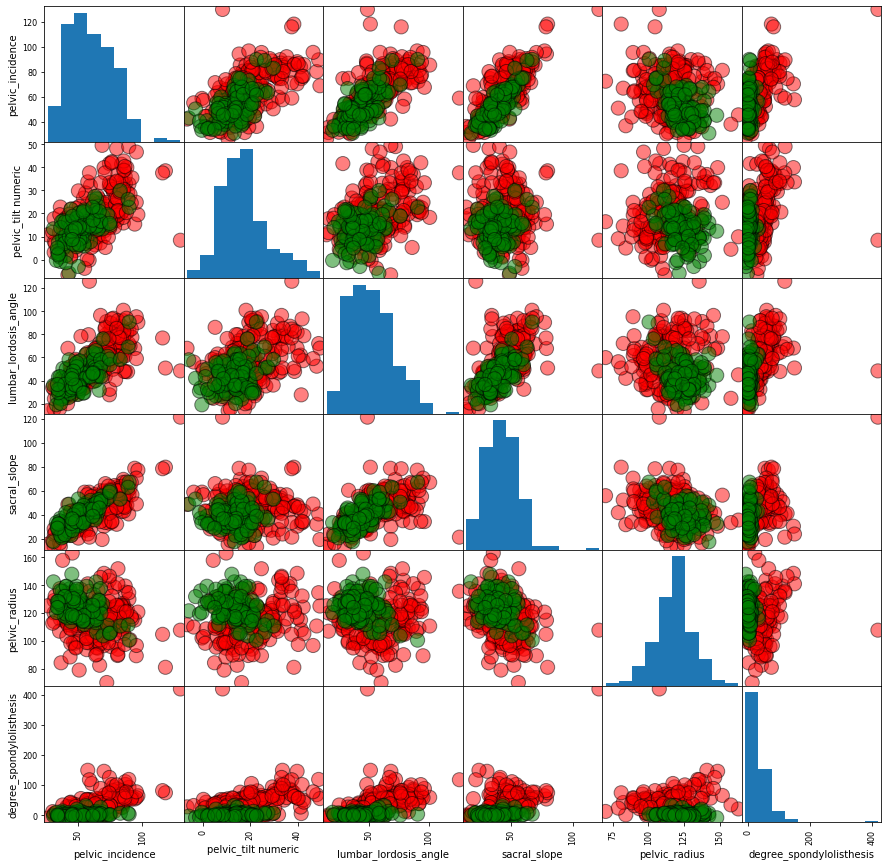

In [48]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = 'o',
                                       edgecolor= "black")
plt.show()

 Okay, scatter matrix there are relations between each feature but how many normal(green) and abnormal(red) classes are there.

## 1.9 Class Distributuon

In [49]:
data.loc[:,'class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

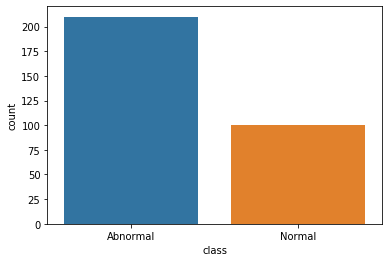

In [50]:
sns.countplot(x="class", data=data)


## 1.10  KNN 

In [51]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)


## 1.11 Measuring model performance:
    Accuracy which is fraction of correct predictions is commonly used metric.

## 1.12   Split our data train and test sets.

    train: use train set by fitting
    test: make prediction on test set.
    With train and test sets, fitted data and tested data are completely different
    train_test_split(x,y,test_size = 0.3,random_state = 1)
    x: features
    y: target variables (normal,abnormal)
    test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
    random_state: sets a seed. If this seed is same number, train_test_split() produce exact same split at each time
    fit(x_train,y_train): fit on train sets
    score(x_test,y_test)): predict and give accuracy on test sets

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)


In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8602150537634409


## 1.13  Model complexity:

    K has general name. It is called a hyperparameter. For now just know K is hyperparameter and we need to choose it that gives best performance.
    Literature says if k is small, model is complex model can lead to overfit. It means that model memorizes the train sets and cannot predict test set with good accuracy.
    If k is big, model that is less complex model can lead to underfit.
    At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 18(best performance), accuracy has highest value almost 88%.

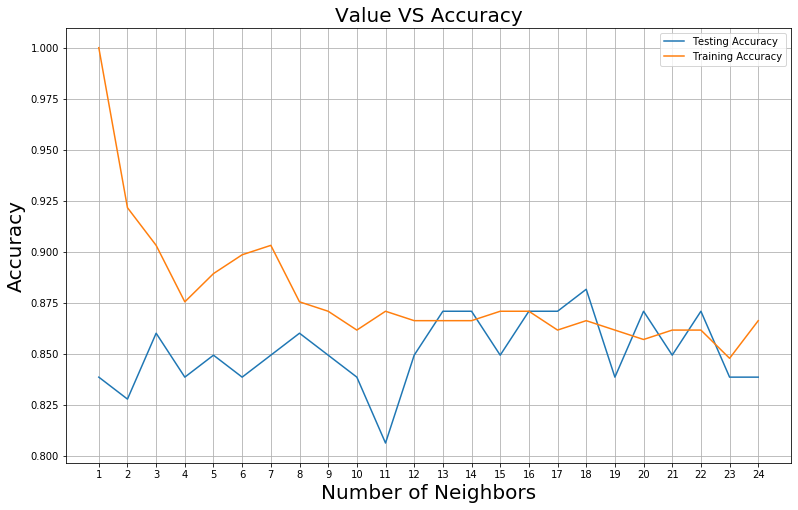

Best accuracy is 0.8817204301075269 with K = 18


In [54]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize=20)
plt.xlabel('Number of Neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

## 1.14  TUNING AND HYPERPARAMETERS

## 1.14a) CASE 1:-

In [59]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


Tuned hyperparameter k: {'n_neighbors': 3}
Best score: 0.7451612903225806


## 1.14 b) CASE 2:-

In [61]:
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn_cv.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn_cv.score(x_test, y_test)))
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))


The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data
Tuned hyperparameter k: {'n_neighbors': 12}
Best score: 0.8571428571428571


## 1.14 c)  CASE 3:-

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12, p=6, metric='minkowski')
knn.fit(x_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))


The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.83 out of 1 on test data


## 1.14 d)  CASE 4:-

In [63]:
from sklearn.neighbors import KNeighborsClassifier
train_score_knn=[]
test_score_knn=[]
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=12, p=i, metric='minkowski')
    knn.fit(x_train, y_train)
    train_score_knn.append(knn.score(x_train, y_train))
    test_score_knn.append(knn.score(x_test, y_test))
    print('For p value=',i)
    print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(x_train, y_train)))
    print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(x_test, y_test)))
    print()


For p value= 1
The accuracy of the knn classifier is 0.85 out of 1 on training data
The accuracy of the knn classifier is 0.86 out of 1 on test data

For p value= 2
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data

For p value= 3
The accuracy of the knn classifier is 0.86 out of 1 on training data
The accuracy of the knn classifier is 0.85 out of 1 on test data

For p value= 4
The accuracy of the knn classifier is 0.88 out of 1 on training data
The accuracy of the knn classifier is 0.84 out of 1 on test data

For p value= 5
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.83 out of 1 on test data

For p value= 6
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of the knn classifier is 0.83 out of 1 on test data

For p value= 7
The accuracy of the knn classifier is 0.87 out of 1 on training data
The accuracy of 

## Pros and Cons of KNN


## Pros
- It is extremely easy to implement
- It is lazy learning algorithm and therefore requires no training prior to making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g SVM, linear regression, etc.
- Since the algorithm requires no training before making predictions, new data can be added seamlessly.
- There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

## Cons
- The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate distance in each dimension.
- The KNN algorithm has a high prediction cost for large datasets. This is because in large datasets the cost of calculating distance between new point and each existing point becomes higher.
- The KNN algorithm doesn't work well with categorical features since it is difficult to find the distance between dimensions with categorical features.

## 2. NAIVE BAYES CLASSIFIER

## 2.1 What is Naive Bayes algorithm?

>It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors.

>In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 
>For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

>Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

>Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

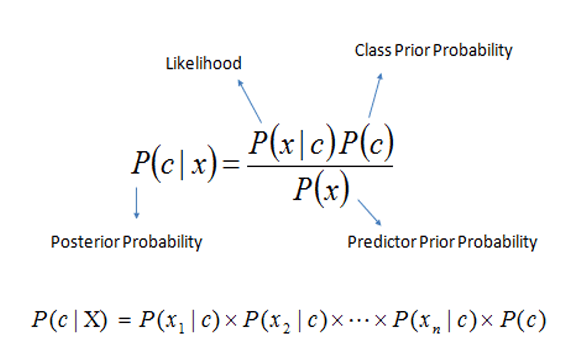

In [64]:
from IPython.display import Image
Image('1.png')

## 2.3 How Naive Bayes algorithm works?

- Let’s understand it using an example. Below I have a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). 
- Now, we need to classify whether players will play or not based on weather condition. 
> - Let’s follow the below steps to perform it.
    - Step 1: Convert the data set into a frequency table
    - Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64. 

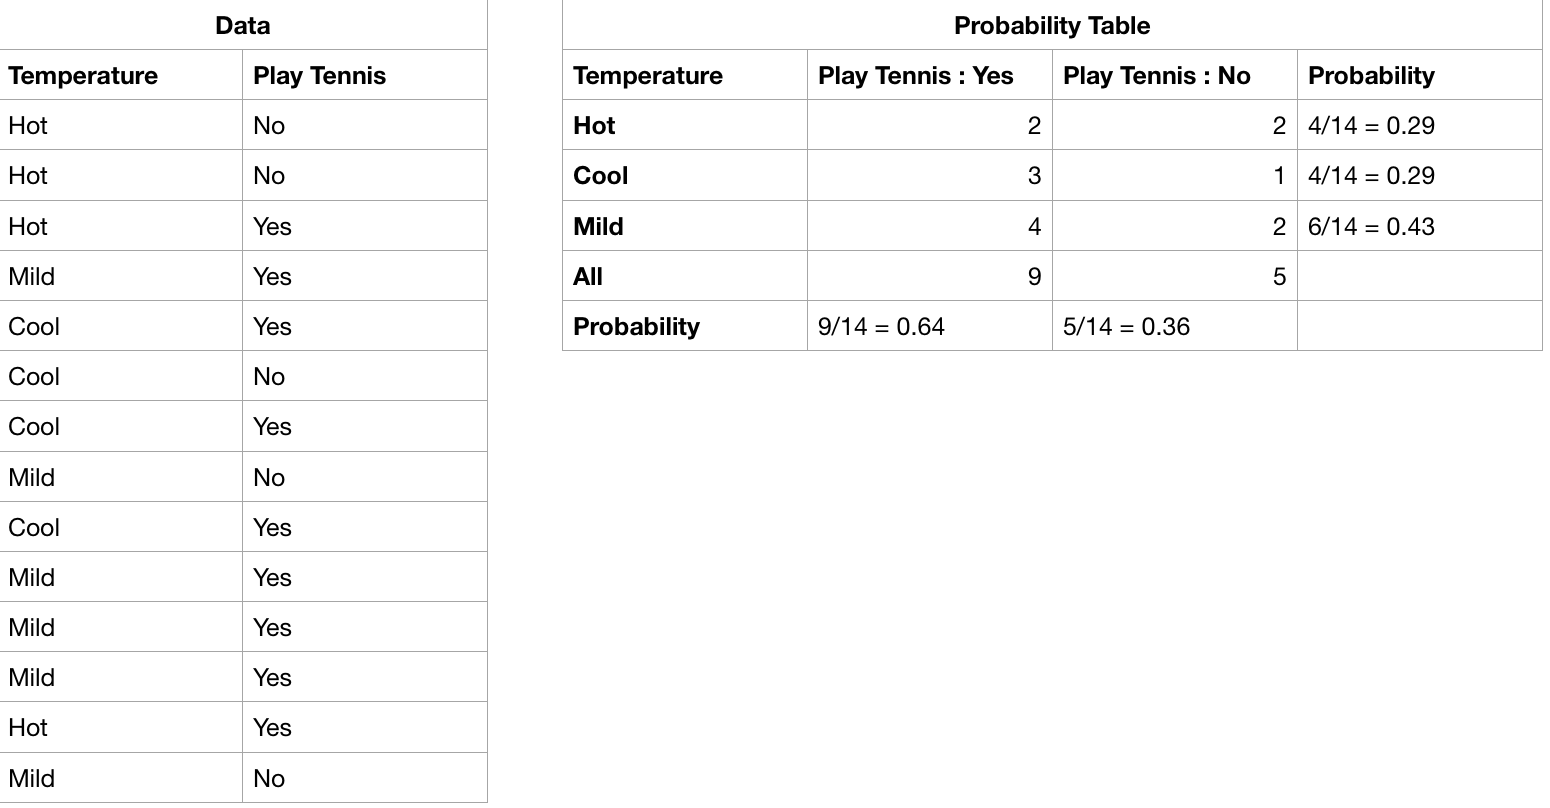

In [65]:
from IPython.display import Image
Image('Data.png')

> - Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

> **Problem**: Players will play if weather is sunny. Is this statement is correct?

>We can solve it using above
discussed method of posterior probability.

>P(Yes | Hot) = P( Hot | Yes) * P(Yes) / P (Hot)

>Here we have P (Hot |Yes) = 3/9 = 0.33, P(Hot) = 5/14 = 0.36, P( Yes)= 9/14 = 0.64

>Now, P (Yes | Hot) = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

>Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.

# Pima Indians Diabetes Dataset


#### About the data:-
 This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


 Input Features:- The datasets consists of several medical predictor variables 

 One target variable:- Outcome. 

Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.




## Objective:- Predict the onset of diabetes based on diagnostic measures

## 2.5 Implement the model using Python

In [66]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

%matplotlib inline

## 2.6 Load Pima Dataset

In [67]:
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Additional details about the attributes:-

>Pregnancies: Number of times pregnant

>Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

>BloodPressure: Diastolic blood pressure (mm Hg)

>SkinThickness: Triceps skin fold thickness (mm)

>Insulin: 2-Hour serum insulin (mu U/ml)

>BMI: Body mass index (weight in kg/(height in m)^2)

>DiabetesPedigreeFunction: Diabetes pedigree function

>Age: Age (years)

>Outcome: Class variable (0 or 1)

## 2.8 NO OF Rows and Columns in the data

In [68]:
df.shape

(768, 9)

## 2.9  Summary of the data

In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2.10  check to if DATA is in which Form Numeric or Categorical?

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2.11 Check if any Null values?

In [71]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### NO Null Values in the data

## 2.11 Grouping Based On Outcome

In [72]:
df.groupby("Outcome").count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


## 2.12  Histogram on the Data

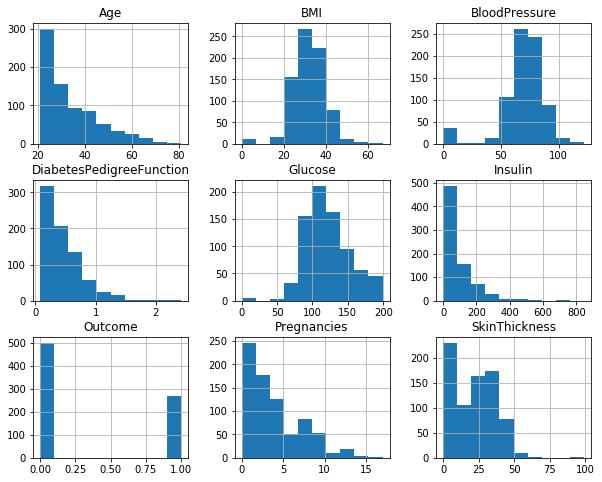

In [73]:
df.hist(figsize=(10,8))
plt.show()

### 2.13 BOXPLOT on the data (Outlier Detection)

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

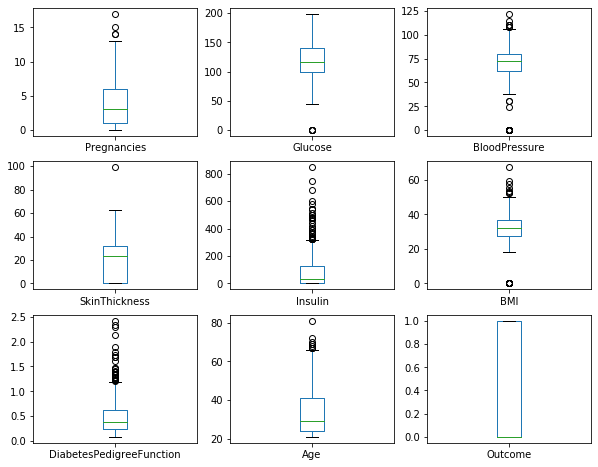

In [74]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

## 2.14 Correlation Matrix of Variables using HeatMap

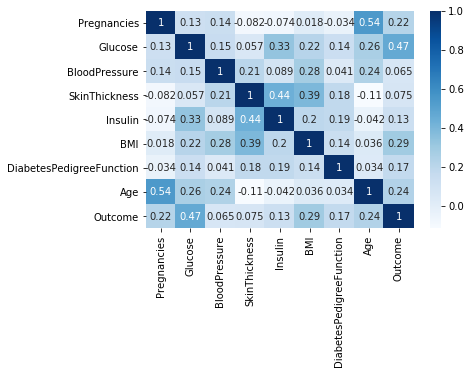

In [75]:
corr = df[df.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

## 2.15  Featues

In [76]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

## 2.16  splitting X and y into training and testing sets 

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

## 2.17 StandardScaler

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)


## 2.18  Classifier Invoking

In [79]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

## 2.19  Evaluation Metrics

In [82]:
cm = confusion_matrix(y_test, y_pred)

In [83]:

print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

0.5192307692307693
0.35064935064935066


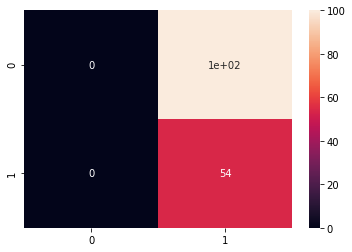

In [84]:
label = ["0","1"]
sns.heatmap(cm, annot=True, xticklabels=label, yticklabels=label)

In [85]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.35      1.00      0.52        54

    accuracy                           0.35       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.12      0.35      0.18       154



## 2.20  Pros and cons

## PROS:-

> 1. Easy to implement
> 2. Requires a small amount of training data to estimate the parameters
> 3. Good results obtained in most of the cases
> 4. Handle Missing Values by ignoring the instance during the probability estimate calculations

## CONS:-
> 1. Assumes Independence of features
> 2. Independence existence may not hold for some attributes
> 3. Practically Dependencies exist among the variables
> 4. So loss of accuracy due to these reasons


# ------------------------------------ Happy Learning -----------------------------------------------